# Méthodes numériques pour les EDOs et EDPs 2025 : Devoir Maison

In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

## Méthode des différences finies 2d sur un maillage rectangulaire pour une équation elliptique

On se propose de résoudre une équation elliptique sur un maillage rectangulaire.

Nous commencerons par résoudre l'équation de Poisson avec des conditions de Dirichlet homogènes :
\begin{equation}
\left\{
\begin{array}{rcll}
-\Delta u &=& f \quad &\mbox{dans } \Omega\\
u&=&0 \quad &\mbox{sur } \partial\Omega
\end{array}
\right.
\tag{P}
\end{equation}

où $\Omega$ est un domaine ouvert de $\mathbb{R}^2$ (qui sera toujours rectangulaire ici), $f\in L^2(\Omega)$ et $u\in H^1(\Omega)$. $\partial\Omega$ désigne le bord du domaine $\Omega$.

Puis, si tout se passe bien, nous essaierons de résoudre un problème elliptique plus général :
\begin{equation}
\left\{
\begin{array}{rcll}
-{\rm div} (\alpha \nabla u) + \beta u &=& f \quad &\mbox{dans } \Omega\\
u&=&u_0 \quad &\mbox{sur } \partial\Omega_0\\
\nabla u.n&=&g \quad &\mbox{sur } \partial\Omega_1
\end{array}
\right.
\end{equation}
où $\alpha$ et $\beta$ seront des fonctions bornées définies sur $\Omega$, constantes ou non, et $u_0$ et $g$ des fonctions définies sur $\partial \Omega = \partial\Omega_0 \cup \Omega_1$. Notons que si $\alpha$ est une constante, on a ${\rm div} (\alpha \nabla u) = \alpha\Delta u$.

### 1. Equation de Poisson

Commençons par l'équation de Poisson $\rm(P)$ sur le domaine $\Omega=]0,a[\times ]0,b[$. Nous allons discrétiser le problème par la méthode des différences finies 2d en utilisant $N_x+1$ points dans la direction $x$ et $N_y+1$ points dans la direction $y$. Nous aurons donc un pas de discrétisation en espace égal à $h=\dfrac{a}{N_x}$ dans la direction $x$ et $k=\dfrac{b}{N_y}$ dans la direction $y$.

Dans toute la suite, pour plus de généralité et aussi plus de clarté dans la démarche, il est recommandé d'écrire les programmes demandés en conservant les paramètres $a,b,N_x,N_y,h,k$, même si, pour les applications numérique on pourra ensuite utiliser $a=b=1$, $N_x = N_y=N$ et donc $h=k=1/N$.

Pour la discrétisation du Laplacien par différences finies, nous allons utiliser le classique schéma centré à 3 points dans chacune des directions d'espace vu en cours, ce qui donne le schéma à 5 points suivant :

Si on note $U_{i,j}$ la solution du problème discret au point de coordonnées logiques $(i,j)$, on aura
$$
-\Delta U_{i,j} \approx \frac{-U_{i-1,j}+2U_{i,j}-U_{i+1,j}}{h^2} 
+\frac{-U_{i,j-1}+2U_{i,j}-U_{i,j+1}}{k^2}
$$

La difficulté supplémentaire par rapport au 1d vu en cours est l'organisation de la matrice, qui va dépendre de la numérotation choisie pour les points du maillages. Nous allons choisir une numérotation séquentielle de la grille, partant du point $(0,0)$ et arrivant au point $(a,b)$ en balayant d'abord les lignes, puis les colonnes de la grille de points. Autrement dit on aura la numérotation suivante :


\begin{array}{|c|c|c|}
\hline
\mbox{coordonnées physiques} & \mbox{numérotation logique} & \mbox{numérotation globale}\\
\hline
(0,0) & (1,1) & 1\\
\hline
(h,0) & (2,1) & 2\\
\hline
(a,0) & (N_x+1,1) & N_x+1\\
\hline
(0,k) & (1,2) & N_x+2\\
\hline
\big((i-1)h,(j-1)k\big) & (i,j) & (j-1)(N_x+1)+i\\
\hline
(0,b) & (1,N_y+1) & N_y(N_x+1)+1\\
\hline
(N_x h,N_y k)=(a,b) & (N_x+1,N_y+1) & (N_x+1)(N_y+1)\\
\hline
\end{array}

#### 1.a 
Écrire le programme qui résout le problème de Poisson $\rm (P)$ pour une fonction $f$ donnée.


Pour les graphes demandés dans ce travail, on pourra s'inspirer des exemples ci-dessous, mais toute initiative sera bienvenue :


In [51]:
def logical_to_global(i,j,Nx,Ny):
    return (j-1)*(Nx+1) + i - 1

def forme_matricielle_poisson1(a,b,Nx,Ny,f):
    h = a/Nx
    k = b/Ny
    
    x = np.linspace(0,a,Nx+1)
    y = np.linspace(0,b,Ny+1)
    X,Y = np.meshgrid(x,y)
    Fh = f(X,Y)
    Fh[:,0] = 0
    Fh[:,-1] = 0
    Fh[0,:] = 0
    Fh[-1,:] = 0
    Fh = Fh.reshape(-1,1)

    Ah = np.zeros(((Nx+1)*(Ny+1),(Nx+1)*(Ny+1)))
    
    # bords
    for i in range(1,Nx+2):
        Ah[logical_to_global(i,1,Nx,Ny),logical_to_global(i,1,Nx,Ny)] = 1
        Ah[logical_to_global(i,Ny+1,Nx,Ny),logical_to_global(i,Ny+1,Nx,Ny)] = 1
    
    for j in range(1,Ny+2):
        Ah[logical_to_global(1,j,Nx,Ny),logical_to_global(1,j,Nx,Ny)] = 1
        Ah[logical_to_global(Nx+1,j,Nx,Ny),logical_to_global(Nx+1,j,Nx,Ny)] = 1
    # intérieur
    for i in range(2,Nx+1):
        for j in range(2,Ny+1):
            Ah[logical_to_global(i,j,Nx,Ny),logical_to_global(i,j,Nx,Ny)] = (2/(k**2))+(2/h**2)
            Ah[logical_to_global(i,j,Nx,Ny),logical_to_global(i-1,j,Nx,Ny)] = -1/(h**2)
            Ah[logical_to_global(i,j,Nx,Ny),logical_to_global(i+1,j,Nx,Ny)] = -1/(h**2)
            Ah[logical_to_global(i,j,Nx,Ny),logical_to_global(i,j-1,Nx,Ny)] = -1/(k**2)
            Ah[logical_to_global(i,j,Nx,Ny),logical_to_global(i,j+1,Nx,Ny)] = -1/(k**2)

    return X,Y,Ah,Fh

def solve_poisson_1(a,b,Nx,Ny,f):
    X,Y,Ah,Fh= forme_matricielle_poisson1(a,b,Nx,Ny,f)
    U = np.linalg.solve(Ah,Fh).reshape(Ny+1,Nx+1)
    return X,Y,U
    

On testera ce programme pour les différents cas suivants et on vérifiera que les résultats sont cohérents en traçant les solutions pour chacun des cas.

(cas 1) $a=b=1$, $N_x=N_y=10$, $f(x,y)=1$.

(cas 2) $a=2$, $b=1$, $N_x=N_y=10$, $f(x,y)=1$.

(cas 3) $a=2$, $b=1$, $N_x=20$, $N_y=10$, $f(x,y)=1$.

(cas 4) $a=1$, $b=2$, $N_x=10$, $N_y=20$, $f(x,y)=1$.

(cas 5) $a=b=\pi$, $N_x=N_y=10$, $f(x,y)=\sin x \sin y$.

Pour ce dernier cas on vérifiera que $u(x,y) = \dfrac{1}{2} f(x,y)$ est la solution exacte de $\rm (P)$ et on pourra tracer l'erreur $E(x_i,y_j) = U_{i,j} - u(x_i,y_j)$.

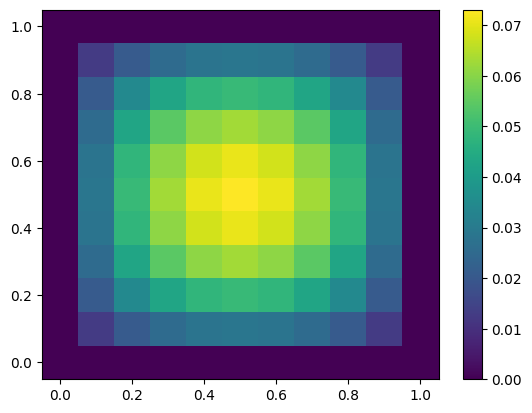

In [52]:
Nx = 10
Ny = 10
a = 1
b = 1
f = lambda x,y : 0*x + 1

X,Y,U = solve_poisson_1(a,b,Nx,Ny,f)
plt.pcolormesh(X, Y, U)
plt.colorbar()

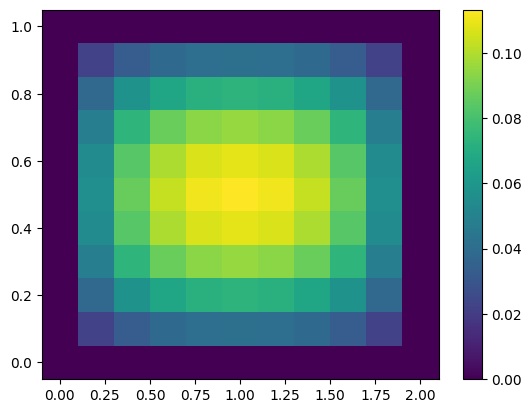

In [53]:
Nx = 10
Ny = 10
a = 2
b = 1
f = lambda x,y : 0*x + 1

X,Y,U = solve_poisson_1(a,b,Nx,Ny,f)
plt.pcolormesh(X, Y, U)
plt.colorbar()

(11, 21) (11, 21) (11, 21)


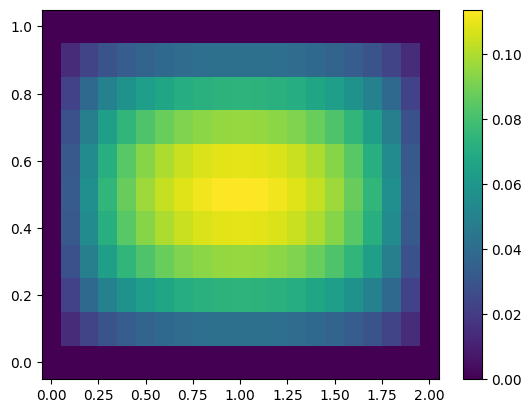

In [54]:
Nx = 20
Ny = 10
a = 2
b = 1
f = lambda x,y : 0*x + 1

X,Y,U = solve_poisson_1(a,b,Nx,Ny,f)
print(X.shape,Y.shape,U.shape)
plt.pcolormesh(X, Y, U)
plt.colorbar()

(21, 11) (21, 11) (21, 11)


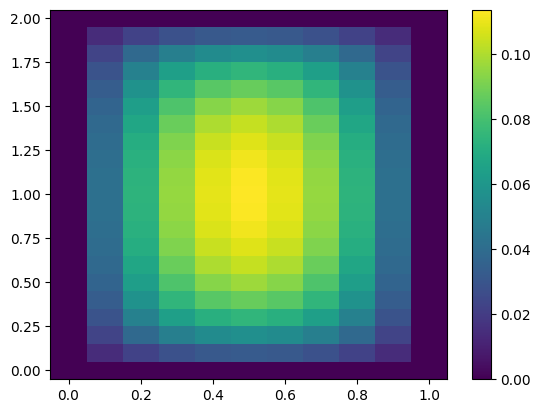

In [55]:
Nx = 10
Ny = 20
a = 1
b = 2
f = lambda x,y : 0*x + 1

X,Y,U = solve_poisson_1(a,b,Nx,Ny,f)
print(X.shape,Y.shape,U.shape)
plt.pcolormesh(X, Y, U)
plt.colorbar()

(11, 11) (11, 11) (11, 11)


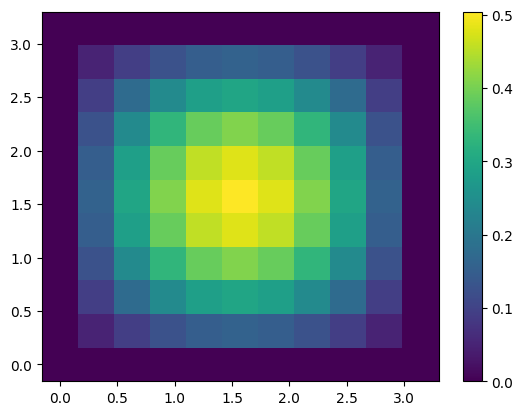

In [56]:
Nx = 10
Ny = 10
a = np.pi
b = np.pi
f = lambda x,y : np.sin(x)*np.sin(y)

X,Y,U = solve_poisson_1(a,b,Nx,Ny,f)
print(X.shape,Y.shape,U.shape)
plt.pcolormesh(X, Y, U)
plt.colorbar()

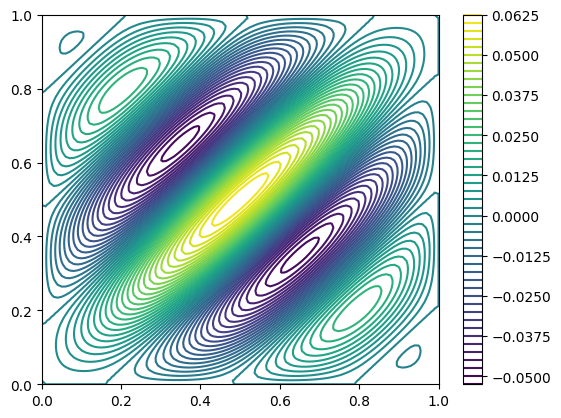

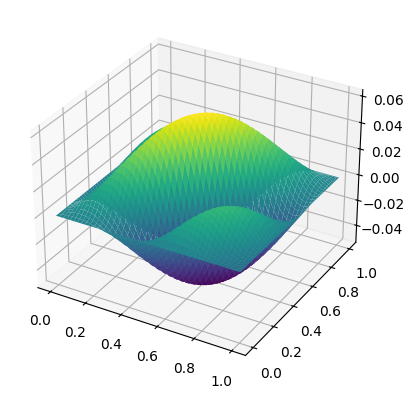

In [8]:
from mpl_toolkits import mplot3d

def u(x,y):
     return x*y*(1-x)*(1-y)*np.cos(10*(x-y))
x = np.linspace(0,1,num=100)
y = np.linspace(0,1,num=100)
X,Y = np.meshgrid(x,y)
Z = u(X,Y)
plt.figure()
plt.contour(X,Y,Z,50)
plt.colorbar();
fig = plt.figure()
ax  = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z,cmap = 'viridis')

#### 1.b
Pour les paramètres $a=b=\pi$ et $f(x,y)=\sin x \sin y$, pour lesquels la solution exacte est connue, faites varier le nombre de points de discrétisation $N_x=N_y=N$ entre 4 et une valeur suffisamment grande (à déterminer par essai-erreur en fonction de la performance de votre programme de sorte que le temps de calcul reste raisonnable sans être trop faible) et tracez le graphe de l'erreur en fonction du pas de discrétisation $h=1/N$. Ce graphe en échelle log-log vous permettra de déterminer expérimentalement - grâce à une régression linéaire - l'ordre de convergence de la méthode que l'on indiquera. On pourra également, pour chaque valeur de $N$, récupérer le temps de calcul $t$ (en s'inspirant de l'exemple ci-dessous) et tracer le graphe $N\mapsto t$ en échelle log-log. Quelle est, toujours expérimentalement, grâce à ce graphe, la complexité de l'algorithme que vous avez programmé ? Autrement dit, pour quelle valeur de $p$ a-t-on $t={\cal O}(N^p)$ ?

In [17]:
import time

start = time.time()

for i in range(10000):
  i**i

t = time.time() - start
print(t)

4.747999668121338


#### 1.c
On vous propose maintenant d'écrire un autre programme, similaire au précédent, mais utilisant un schéma à 9 points pour le laplacien 2d. Vous trouverez sans peine les formules pour ce schéma dans la littérature.

Vérifiez son bon fonctionnement en reprenant la question 1.b avec ce nouveau schéma. On pourra commenter l'augmentation (ou pas?) du temps de calcul par rapport au schéma précédent pour un même nombre de point $N$.

Comparez la précision obtenue pour ce nouveau schéma à 9 points sur le cas-test de la question 1.b avec celle obtenue par le schéma à 5 points, en traçant sur un même graphique l'erreur obtenue pour les deux schémas en fontion de $N$ (en échelle log-log).

#### 1.d
Comparez maintenant les précisions respectives des deux schémas en fonction de $N$, comme à la question 1.c, sur le cas-test suivant :

(cas 6) $a=b=1$,
$$f(x,y)=20(x-y)(1+x+y+2xy)\sin(10(x-y)) + 2\big(100xy(1-x)(1-y)+x(1-x)+y(1-y)\big)\cos(10(x-y)).$$

Cette expression peux sembler compliquée, mais si $$u(x,y)=xy(1-x)(1-y)\cos(10(x-y)),$$ qui est la fonction programmée plus haut à titre d'exemple graphique, on a $-\Delta u = f$. Vous pourrez donc comparer votre solution approchée à la solution exacte. Notez que cette solution est plus "anisotrope" que dans les cas précédents et on peut imaginer que le schéma à 9 points, qui inclut les contributions des voisins en diagonale, soit plus précis que le schéma à 5 points. Tous les commentaires seront bienvenus.

### 2. Équation elliptique plus générale

Modifier le programme précédent pour résoudre
\begin{equation}
\left\{
\begin{array}{rcll}
-{\rm div} (\alpha(x,y) \nabla u(x,y)) + \beta(x,y) u(x,y) &=& f(x,y) \quad &\mbox{dans } \Omega\\
u(x,y)&=&0 \quad &\mbox{sur } \partial\Omega\
\end{array}
\right.
\tag{E}
\end{equation}

où $\alpha(x,y)$ et $\beta(x,y)$ sont des fonctions bornées définies sur $\Omega$. Proposez une modification du schéma à 5 points du laplacien pour tenir compte de la fonction $\alpha$.

Notez qu'il y a le terme supplémentaire $\beta u$ par rapport à l'équation précédente qui va donner un terme supplémentaire dans le système discret (appelé "matrice de masse"),

Écrivez une fonction qui prend en entrée les tailles de discrétisation $N_x$ et $N_y$ et les tableaux $\alpha, \beta, f$ et renvoie la solution du problème elliptique $\rm (E)$. Testez votre programme avec imagination et proposez des cas-tests pertinents. $\alpha$ pourra par exemple décrire 2 matériaux distincts de coefficients constant $\alpha_1$ et $\alpha_2$ formant une inclusion dans le domaine. Dans ce cas, si $f=$constante, le phénomène physique modélisé pourra être vu comme le calcul de la répartition de température dans un objet carré contenant un matériau donné et une inclusion de meilleur conducteur de la chaleur (ou de moins bon, selon que l'on a $\alpha_1 > \alpha_2$ ou l'inverse), avec une température nulle imposée sur le bord (condition de Dirichlet) et un chauffage uniforme sur la surface (terme source $f$).


### 3. Conditions aux limites mixtes

Comment feriez-vous pour modifier le programme précédent pour résoudre le problème elliptique avec des conditions aux limites de Dirichlet non-homogène sur une partie de la frontière et de Neumann non homogène sur une autre partie de la frontière ? 

\begin{equation}
\left\{
\begin{array}{rcll}
-{\rm div} (\alpha \nabla u) + \beta u &=& f \quad &\mbox{dans } \Omega\\
u&=&u_0 \quad &\mbox{sur } \Gamma_0\\
\nabla u.n&=&g \quad &\mbox{sur } \Gamma_1
\end{array}
\right.
\tag{E2}
\end{equation}

Pour tester on prendra $\Omega=]0,1[^2$, $\Gamma_1 = \{(x,y)\in [0,1]^2, x = 0\}$ et $\partial\Omega = \Gamma_0 \cup \Gamma_1$. Pour les conditions de Dirichlet et Neuman non homogènes on prendra $u_0=1$ sur $\Gamma_0$ et $g=1$ sur $\Gamma_1$.



### 4. Optimisation de votre programme

On revient maintenant au premier programme qui résout l'équation de Poisson $\rm (P)$ et on va utiliser les paramètres $a=b=1$, $N_x=N_y=N$, $f(x,y)=1$. Vous avez évalué dans la partie 1 l'évolution du temps de calcul en fonction du nombre de points dans une direction d'espace $N$.

On vous propose de modifier la façon de stocker la matrice $A_h$ obtenue en discrétisant $\rm (P)$ par différences finies, ainsi que la méthode de résolution du système linéaire, pour exploiter le fait qu'elle a une structure particulière, avec énormément de coefficients nuls. Pour cela vous irez chercher la librairie `scipy` et les routines qui se trouvent dans la sous-librairie `scipy.sparse.linalg`. Refaites l'étude de l'évolution du temps de calcul en fonction de $N$ avec cette nouvelle version du programme. Observez-vous un gain significatif de performance ? Commentez.